In [1]:
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update(
   "livereveal", {
       'width': 1500,
       'height': 700,
       "scroll": True,
})

{'width': 1500, 'height': 700, 'scroll': True}

# DSC 10 Discussion: Week 6
---

# Probability
---

## Q: What is a measure of probability?
---

A: Measure of the likelihood an event is going to occur out of the number of possible events.

## Q: In general, how do we find a probability for equally likely events?
---

A: Out of the possible outcomes at a given time:
* If there can only be one event that can occur (mutually exclusive)
* And all outcomes are equally likely 

You can divide the number of outcomes that represent your event by the total number of possible outcomes

## Q: How do we calculate probability via experimentation or simulation?
---

A: Number of outcomes that represent your event that occurred in your sample divided by total outcomes of the sample

# Let's make a dataset
---

Let's create our datasets instead of downloading them, for precise analysis

We'll be coming up with games and creating the rules, and then simulating matches to generate a dataset.

### First let's create a game and a dataset to go with it.

### GAME: You roll a die and flip a coin. Score equals: roll * 1 if heads or roll * 2 if tails.

Examples:

* Side Heads, Roll 5: Score 5
* Side Tails, Roll 3: Score 6

## Let's create a dataset that contains every possible outcome
### Q: Why is this helpful?

```
A: We can use this to calculate the probability of each outcome!
```

In [38]:
bpd.DataFrame().assign(
    Roll = [2],
    Flip = [1], # Heads 0, Tails 1
    Score = [4]
)

,Roll,Flip,Score
0,2,1,4


### Q: How many different rows will we have in our final table? (AKA how many different outcomes are there?)

A: 6 (different dice rolls) * 2 (different coin flips) = 12 possible outcomes

What if we had one die and 2 coins?

6 * 2 * 2 = 24

What if we had one normal coin and two biased dice?

If both dice can still show all possbilities, with p > 0

Then:
    
2 * 6 * 6 = 72

But imagine one die is so biased that it **never** lands 1 or 4?

Then:
    
2 * 4 * 6 = 48

## What logic should we use to populate our columns?

- Use loops to create the roll and flip columns
- calculate the score column afterwards

In [7]:
rolls = np.array([], dtype = np.int)
flips = np.array([], dtype = np.int)

# Every possible roll of a die
for roll in np.arange(1, 7):
    # Every possible flip of a coin
    for flip in np.arange(2):
        rolls = np.append(rolls, roll)
        flips = np.append(flips, flip)

In [8]:
rolls

array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6])

In [9]:
flips

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [10]:
possibilities = bpd.DataFrame().assign(
    Roll = rolls,
    Flip = flips,
)
possibilities

,Roll,Flip
0,1,0
1,1,1
2,2,0
3,2,1
4,3,0
...,...,...
7,4,1
8,5,0
9,5,1
10,6,0


## Now we should add the "Score" column,
### Q: How do we do this?
Rules reminder: You roll a die and flip a coin. Score equals: roll * 1 if heads or roll * 2 if tails.

In [11]:
possibilities

,Roll,Flip
0,1,0
1,1,1
2,2,0
3,2,1
4,3,0
...,...,...
7,4,1
8,5,0
9,5,1
10,6,0


In [12]:
scores = possibilities.get("Roll") * (1 + possibilities.get("Flip"))
scores

0      1
1      2
2      2
3      4
4      3
      ..
7      8
8      5
9     10
10     6
11    12
Length: 12, dtype: int64

In [13]:
possibilities = possibilities.assign(
    Score =  scores
)
possibilities

,Roll,Flip,Score
0,1,0,1
1,1,1,2
2,2,0,2
3,2,1,4
4,3,0,3
...,...,...,...
7,4,1,8
8,5,0,5
9,5,1,10
10,6,0,6


# Let's look at the distribution of scores
---

We want to figure out the exact probability of all possible sums of the game are, based on all possible rolls and flips.

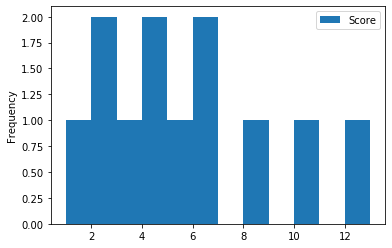

In [14]:
# Let's make the bins of this histogram go from min to max
possibilities.plot(kind = "hist", y = "Score", 
    bins = np.arange(
        possibilities.get("Score").min(), possibilities.get("Score").max() + 2, 1
    )
)

In [15]:
# Let's save those bins for the future
bins = np.arange(possibilities.get("Score").min(), possibilities.get("Score").max() + 2, 1)
bins

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

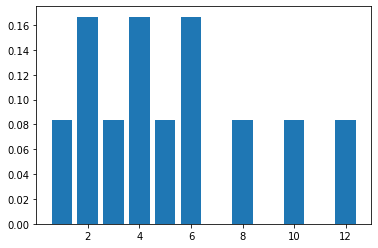

In [16]:
# I also want to print out all of the probabilities for reference
x, y = [], []
for value in np.unique(possibilities.get("Score")):
    y.append(value)
    x.append(possibilities[possibilities.get("Score") == value].shape[0] / possibilities.shape[0])
plt.bar(y, x);

### How is this different than the histogram?

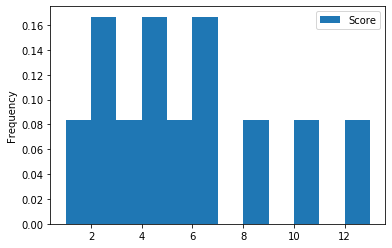

In [17]:
# Let's make the bins of this histogram go from min to max ;) 
possibilities.plot(kind = "hist", y = "Score", 
    bins = np.arange(
        possibilities.get("Score").min(), possibilities.get("Score").max() + 2, 1
    ), density = True
)

# Distributions: a quick aside
---

## Probability Distribution of a Statistic

* “Sampling distribution” or “probability distribution” of the statistic
    - All possible values of the statistic and all the corresponding probabilities.
* Can be hard to calculate: 
    - either have to do the math or have to generate all possible samples and calculate the statistic based on each sample


## Empirical Distribution of a Statistic
* Empirical distribution of the statistic
    - Based on simulated values of the statistic
    - Consists of all the observed values of the statistic,
    - and the proportion of times each value appeared

* Good approximation to the probability distribution of the statistic 
    - if the number of repetitions in the simulation is large


## Q: Can we design a game that has a uniform score distribution with the one die and coin? What would such a game be?

```
Flip of heads adds 6 to the dice roll, tails adds 0. Would this have a uniform prob. distribution.
```

Answer: Yes!

# Let's simulate our game
---

Say I wanted to simulate matches of the game we defined above.

In [18]:
def score(roll, flip):
    return roll * (flip + 1)

In [19]:
# We could write a function
def simulate():
    roll = np.random.choice(np.arange(1, 7))
    flip = np.random.choice(np.arange(2))
    return score(roll, flip)

# And use it a bunch of times
trials = 10000
results = np.array([], dtype = np.int)

for i in np.arange(trials):
    roll_result = simulate()
    results = np.append(results, roll_result)
    
results

array([4, 6, 2, ..., 6, 2, 2])

# But... this seems familiar.  Have we seen these "simulations" before?

```
Every match is already in our table of possibilities.
```

# So, what does that mean we can do instead of simulating?

```
We can just sample from our `possibilities` table!
```

# Sampling
---

Sampling is a way of getting a subset of population.

## What do we use sampling for?

```
We can use sampling to estimate a population statistic when we don't have 
our hands on the full population! And in real life we almost never have the full population.
```

### Can you think of some examples where we won't have the full population?

Example: Election polls, we can't ask the whole country their opinion in a poll!

### Deterministic sample:
* Sampling scheme doesn’t involve chance

### Probability (random) sample:
* Before the sample is drawn, you have to know the probability of selecting each group of people in the population
* Not all individuals need to have an equal chance of being selected

In [20]:
# If we take every row with a score of 6
# what type of sampling is this?

possibilities[possibilities.get("Score") == 6]

,Roll,Flip,Score
5,3,1,6
10,6,0,6


```
Deterministic
```

In [21]:
# If we sample a random selection of 5 rows
# what type of sampling is this?

possibilities.sample(5)

,Roll,Flip,Score
10,6,0,6
8,5,0,5
4,3,0,3
7,4,1,8
2,2,0,2


```
Random
```

In [48]:
# If we sample a random selection of 5 rows
# what type of sampling is this?

np.random.seed(42)
sample_index = np.random.choice(np.arange(5), 5)
np.random.seed()
possibilities.take(sample_index)

,Roll,Flip,Score
3,2,1,4
4,3,0,3
2,2,0,2
4,3,0,3
4,3,0,3


Deterministic

In [22]:
# What if we sample the first 5 rows that we see?
# Is this not the same as simulating 5 times?
# What kind of sampling is this?

possibilities.take(np.arange(5))

,Roll,Flip,Score
0,1,0,1
1,1,1,2
2,2,0,2
3,2,1,4
4,3,0,3


```
Deterministic
```

In [23]:
# Okay, what if we shuffle the possibilities, and then pick the first 5?
# Should be fine, right?

row_ids = np.arange(possibilities.shape[0])

np.random.shuffle(row_ids)
shuffled = possibilities.iloc[row_ids]
shuffled.take(np.arange(5))

,Roll,Flip,Score
3,2,1,4
5,3,1,6
9,5,1,10
0,1,0,1
8,5,0,5


```
This is the same as the sample without replacement
```

In [24]:
# How about this? Deterministic / Random?

to_sample = possibilities[possibilities.get("Score") >= 3]

row_ids = np.arange(to_sample.shape[0])

np.random.shuffle(row_ids)
shuffled = to_sample.iloc[row_ids]
shuffled.take(np.arange(5))

,Roll,Flip,Score
4,3,0,3
11,6,1,12
3,2,1,4
7,4,1,8
10,6,0,6


```
Random selection from a deterministic subset of the data
```

# What conditions must be satisfied for accurate sampling?
# What do we mean by "accurate" sampling?
---

I'm glad you asked!

# Accuracy vs. Precision

Accuracy: close to the true value
    
Precision: individual guesses are all close together

In [25]:
# Recall that sampling is a way for us to discover things about
# a population when we don't have access to that population.
#
# So by that logic, an "accurate" sample would mean...

```
That we can accurately predict things about the population using the sample.
```

# Law of Large Numbers
---
As long as we satisfy the conditions for an accurate sample then we know that:
- As the number of samples increases, the distribution of sample results will approach the true distribution of the population

In other words, the empirical distribution will get closer to the probability distribution

In [26]:
# Let's verify this ourselves

In [27]:
# We can define a simulate function
def simulate(num):
    return possibilities.sample(num, replace = True).get("Score")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


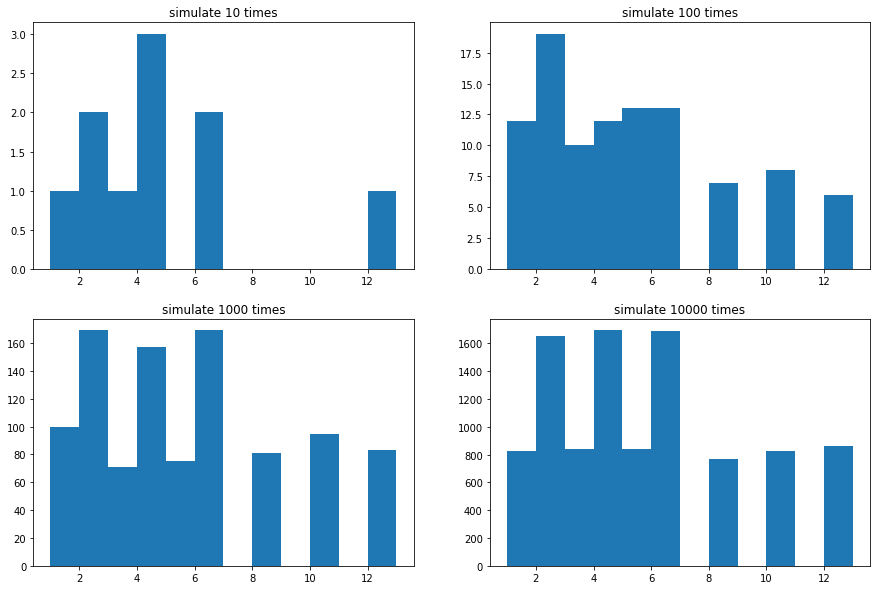

In [28]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
x = 0
for trials in [10, 100, 1000, 10000]:
    x += 1
    plt.subplot(2,2,x)
    plt.hist(simulate(trials), bins = bins)
    plt.title("simulate {} times".format(trials))

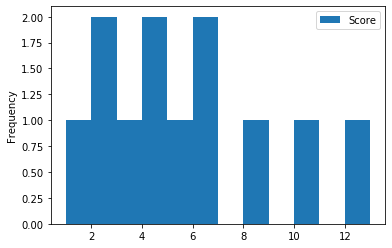

In [29]:
possibilities.plot(kind = "hist", y= "Score", bins = bins)

# Sample statistics
---

In addition to the distribution of sample results approaching the true distribution, the average of sample statistics will approach the true population statistic.

## What's a sample statistic?

```
A measurement of the sample, like the mean, median, or min+max/2
```

## Let's try and calculate a sample statistic
---
In addition to choosing a statistic (we'll be using mean of scores in the game), there's another thing we must decide.


What is it?

```
Sample size
```

# What does our sample statistic translate to in words?

```
For sample size of 100:
Our sample mean is the average score of 100 simulated games
```

In [53]:
# Alright, now let's compute a sample statistic.  Try with multiple sizes.
sample_size = 10
simulate(sample_size).mean()

4.7

In [61]:
# Let's find another sample statistic
sample_size = 5
sample = simulate(sample_size)
(sample.min() + sample.max()) / 2 

5.5

# Distribution of Sample Statistics
---

Recall, we said that:
>As the number of trials grows large, the average of the distribution of sample statistics approaches the population average for that statistic.

# But... how does "number of trials" differ from "sample size"?

```
Number of trials is the number of unique samples we take to calculate our final guess of sample statistic.

Sample size is the size of each of the unique samples.
```

In [32]:
# Alright, let's find a bunch of sample statistics and find their average.
trials = 1000
sample_size = 10

sample_stats = np.array([])

for trial in np.arange(trials):
    stat = simulate(sample_size).mean()
    sample_stats = np.append(sample_stats, stat)
    
np.mean(sample_stats)

5.2534

### What is the actual population statistic?

In [33]:
possibilities.get("Score").mean()

5.25

# Let's change around the statistic we calculate

In [69]:
# Alright, let's find a bunch of sample statistics and find their average.
trials = 1_000
sample_size = 10

sample_stats = np.array([])

for trial in np.arange(trials):
    stat = simulate(sample_size).max()
    sample_stats = np.append(sample_stats, stat)
    
sample_stats.mean(), possibilities.get("Score").max()

(10.755, 12)

We are underestimating, how could we make the prediction better?

Ans: sample_stats.max()

1, 2, 3, 4, 

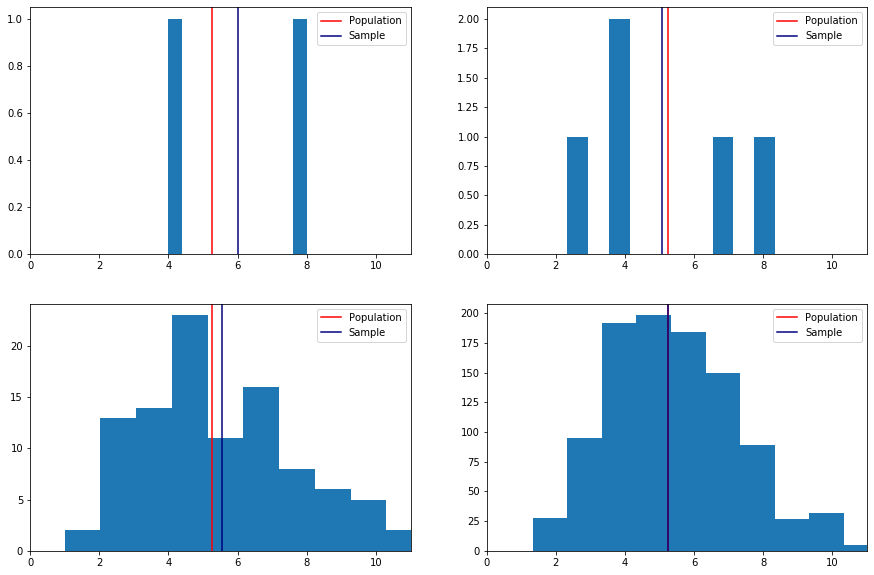

In [70]:
# Let's plot the distribution of sample means and see what's going on as trials
# and sample size change.


sample_size = 3
plt.figure(figsize=(15,10))
x = 0

for trials in [2, 5, 100, 1000]:
    
    sample_stats = np.array([])
    
    x += 1
    print(x, end = ', ')
    plt.subplot(2,2,x)
    
    for trial in np.arange(trials):
        stat = simulate(sample_size).mean()
        sample_stats = np.append(sample_stats, stat)
        

    plt.hist(sample_stats)
    plt.axvline(possibilities.get("Score").mean(), c='r')
    plt.axvline(np.mean(np.mean(sample_stats)), c='navy')
    plt.legend(["Population", "Sample"]);
    plt.xlim((0,11))


# What is the relationship between accuracy and trials?

```
As the number of trials increases, the accuracy increases
```

# What is the relationship between accuracy and sample size?

```
As the sample size increases, the accuracy increases
```

# How about...

# High precision, Low Accuracy

In [36]:
# Let's say for some reason we have biased sampling

biased_pos = possibilities[possibilities.get("Score") >= 3]

def simulate_biased(num):
    return biased_pos.sample(num, replace = True).get("Score")

1, 2, 3, 4, 

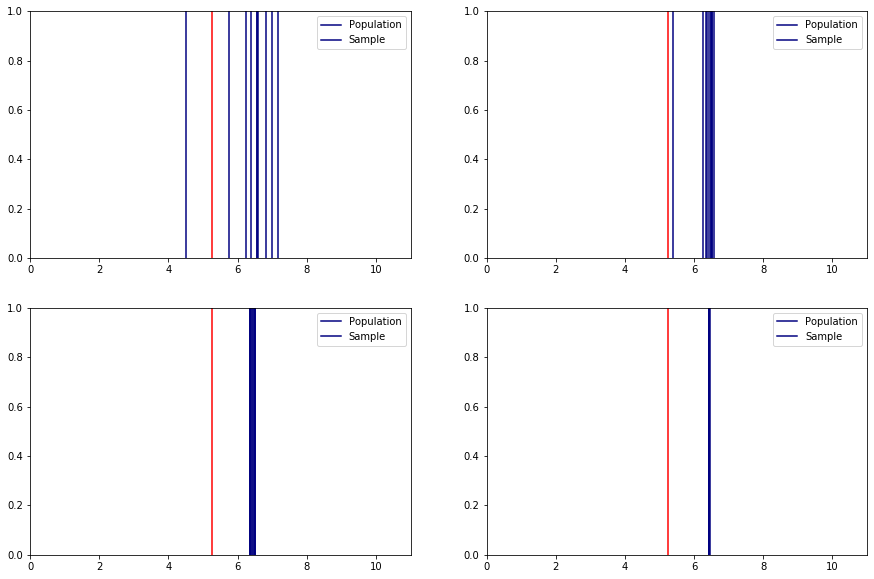

In [37]:
# Let's plot the sample, we are always doing 10 trials, but we are using changing sample sizes
# We are working with the biased samples

plt.figure(figsize=(15,10))
x = 0
trials = 10

for sample_size in [2, 5, 100, 10_000]:
    
    x += 1
    print(x, end = ', ')
    plt.subplot(2,2,x)
    
    sample_stats = np.array([])
    
    for trial in np.arange(trials):
        stat = simulate_biased(sample_size).mean()
        sample_stats = np.append(sample_stats, stat)
        plt.axvline(np.mean(sample_stats), c='navy')
        

    # plt.hist(sample_stats)
    plt.axvline(possibilities.get("Score").mean(), c='r')
    plt.legend(["Population", "Sample"]);
    plt.xlim((0,11))

Our estimate of the mean is getting more precise, but it is not accurate.